# Определение поверхностей

Выделение полигонов на упаковке

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [3]:
def mark_polygon(path):
    # Загрузка изображения
    image = cv2.imread(path)
    # Преобразование изображения в оттенки серого
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(grayscale_image, 100, 120, cv2.THRESH_BINARY)
    # Поиск всех контуров
    all_contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in all_contours]
    max_index = np.argmax(areas)
    cnt = all_contours[max_index]
    approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
    
    return image,approx

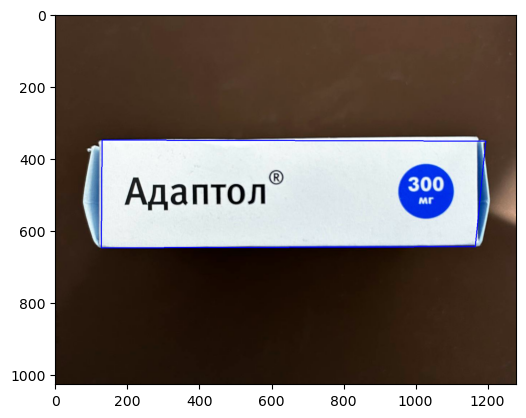

In [4]:
image,approx=mark_polygon("images/boxes/original/photo_1_2024-05-03_09-29-28.jpg")
cv2.imshow("img",image)
cv2.waitKey(0) 
cv2.destroyAllWindows() 
plt.imshow(cv2.drawContours(image, [approx], 0, (0, 0, 255), 2))
plt.show()

}Преобразование полигонов в прямоугольник

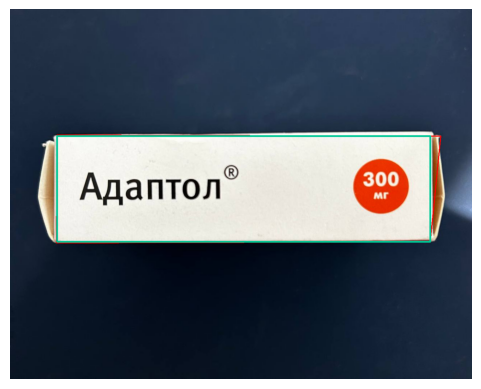

In [16]:
y=[elem for i in (approx[:,:,1]) for elem in i]
x=[elem for i in (approx[:,:,0]) for elem in i]
x.sort()
y.sort()
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_dub=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.rectangle(image_rgb, (x[1], y[1]), (x[2], y[2]), (0, 200, 150), 3)  # RGB цвет для прямоугольника - красный
plt.imshow(image_rgb)
plt.axis('off')  # Убрать оси координат
plt.show()

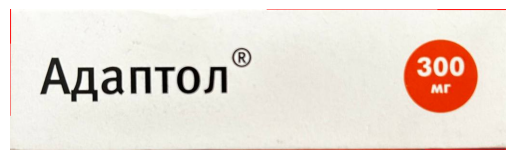

In [17]:
cropped_image = image_dub[y[1]:y[2], x[1]:x[2]]
plt.imshow(cropped_image)
plt.axis('off')  # Убрать оси координат
plt.show()


In [18]:
# Сохраняем вырезанный прямоугольник как изображение
cv2.imwrite('cropped_image.jpg', cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))

print("Вырезанный прямоугольник сохранен как 'cropped_image.jpg'")

Вырезанный прямоугольник сохранен как 'cropped_image.jpg'
